In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [8]:
#Load Data
df1=pd.read_csv('datasets/MachineLearningCVE/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2=pd.read_csv('datasets/MachineLearningCVE/CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df3=pd.read_csv('datasets/MachineLearningCVE/CICIDS2017/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df4=pd.read_csv('datasets/MachineLearningCVE/CICIDS2017/Monday-WorkingHours.pcap_ISCX.csv') # all is benign traffic
df5=pd.read_csv('datasets/MachineLearningCVE/CICIDS2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df6=pd.read_csv('datasets/MachineLearningCVE/CICIDS2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df7=pd.read_csv('datasets/MachineLearningCVE/CICIDS2017/Tuesday-WorkingHours.pcap_ISCX.csv')
df8=pd.read_csv('datasets/MachineLearningCVE/CICIDS2017/Wednesday-workingHours.pcap_ISCX.csv')

In [21]:
#Concatenate all data into one DataFrame
df=pd.concat([df1,df2,df3,df5,df6,df7,df8])
del df1,df2,df3,df4,df5,df6,df7,df8
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2300825 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [22]:
# drop duplicates
df = df.drop_duplicates()
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [23]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

### Select Feature & modify special word/number

In [24]:
df = df.drop([' Destination Port', ' Fwd Packet Length Max', ' Fwd Packet Length Mean', ' Bwd Packet Length Min', ' Flow IAT Mean', 
              ' Flow IAT Max', ' Flow IAT Min',' Fwd IAT Std', ' Fwd IAT Min', 'Bwd IAT Total', 
              'Fwd PSH Flags' , ' Fwd URG Flags', ' Bwd URG Flags', ' Min Packet Length', ' Packet Length Mean', 
              ' Packet Length Variance', ' RST Flag Count', ' PSH Flag Count', ' URG Flag Count', 
              ' CWE Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' CWE Flag Count', ' CWE Flag Count',
              'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 
              'Init_Win_bytes_forward', ' min_seg_size_forward', 'Active Mean', ' Active Min', 'Idle Mean', ' Idle Max', ' Idle Min'], axis=1)
df 

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,...,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,Active Std,Active Max,Idle Std,Label
0,3,2,0,12,0,6,0.00000,0,0.0,0.0,...,2,12,0,0,-1,1,0.0,0,0.0,BENIGN
1,109,1,1,6,6,6,0.00000,6,6.0,0.0,...,1,6,1,6,256,0,0.0,0,0.0,BENIGN
2,52,1,1,6,6,6,0.00000,6,6.0,0.0,...,1,6,1,6,256,0,0.0,0,0.0,BENIGN
3,34,1,1,6,6,6,0.00000,6,6.0,0.0,...,1,6,1,6,329,0,0.0,0,0.0,BENIGN
4,3,2,0,12,0,6,0.00000,0,0.0,0.0,...,2,12,0,0,-1,1,0.0,0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,32215,4,2,112,152,28,0.00000,76,76.0,0.0,...,4,112,2,152,-1,3,0.0,0,0.0,BENIGN
692699,324,2,2,84,362,42,0.00000,181,181.0,0.0,...,2,84,2,362,-1,1,0.0,0,0.0,BENIGN
692700,82,2,1,31,6,0,21.92031,6,6.0,0.0,...,2,31,1,6,0,0,0.0,0,0.0,BENIGN
692701,1048635,6,2,192,256,32,0.00000,128,128.0,0.0,...,6,192,2,256,-1,5,0.0,0,0.0,BENIGN


In [25]:
# Removing whitespaces in column names.
col_names = [col.replace(' ', '') for col in df.columns]
df.columns = col_names
df.head()

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMean,BwdPacketLengthStd,...,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_backward,act_data_pkt_fwd,ActiveStd,ActiveMax,IdleStd,Label
0,3,2,0,12,0,6,0.0,0,0.0,0.0,...,2,12,0,0,-1,1,0.0,0,0.0,BENIGN
1,109,1,1,6,6,6,0.0,6,6.0,0.0,...,1,6,1,6,256,0,0.0,0,0.0,BENIGN
2,52,1,1,6,6,6,0.0,6,6.0,0.0,...,1,6,1,6,256,0,0.0,0,0.0,BENIGN
3,34,1,1,6,6,6,0.0,6,6.0,0.0,...,1,6,1,6,329,0,0.0,0,0.0,BENIGN
4,3,2,0,12,0,6,0.0,0,0.0,0.0,...,2,12,0,0,-1,1,0.0,0,0.0,BENIGN


In [26]:
# Replace weird characters
label_names = df['Label'].unique()

import re
label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]
label_names, len(label_names)

# Replacing 'Label' column values with new readable values.
labels = df['Label'].unique()
for i in range(0,len(label_names)):
    df['Label'] = df['Label'].replace({labels[i] : label_names[i]})
    
df['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'FTPPatator', 'SSHPatator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed'], dtype=object)

In [27]:
df['Label'].value_counts().to_frame().sort_index(ascending=True)

,count
Label,
BENIGN,1593852
Bot,1953
DDoS,128016
DoS_GoldenEye,10286
DoS_Hulk,172849
DoS_Slowhttptest,5228
DoS_slowloris,5385
FTPPatator,5933
Heartbleed,11


### Sample dataframe by Benign into smaller size

In [28]:
from sklearn.model_selection import train_test_split

label_Benign_df1, label_Benign_df2 = train_test_split(df[df['Label'] == 'BENIGN'], test_size=0.02)
# label_DDoS_df1, label_DDoS_df2 = train_test_split(df[df['Label'] == 'Bot'], test_size=0.05)
# label_DDoS_df1, label_DDoS_df2 = train_test_split(df[df['Label'] == 'DDoS'], test_size=0.05)
# label_DoS_GoldenEye_df1, label_DoS_GoldenEye_df2 = train_test_split(df[df['Label'] == 'DoS_GoldenEye'], test_size=0.05)
# label_DoS_Hulk_df1, label_DoS_Hulk_df2 = train_test_split(df[df['Label'] == 'DoS_Hulk'], test_size=0.05)
# label_DoS_Slowhttptest_df1, label_DoS_Slowhttptest_df2 = train_test_split(df[df['Label'] == 'DoS_Slowhttptest'], test_size=0.1)
# label_DoS_slowloris_df1, label_DoS_slowloris_df2 = train_test_split(df[df['Label'] == 'DoS_slowloris'], test_size=0.05)
# label_DoS_FTPPatator_df1, label_DoS_FTPPatator_df2 = train_test_split(df[df['Label'] == 'DoS_FTPPatator'], test_size=0.05)
# label_PortScan_df1, label_PortScan_df2 = train_test_split(df[df['Label'] == 'PortScan'], test_size=0.01)
# label_Web_Attack_Brute_Force_df1, label_Web_Attack_Brute_Force_df2 = train_test_split(df[df['Label'] == 'Web_Attack_Brute_Force'], test_size=0.05)
# label_Web_Attack_XSS_df1, label_Web_Attack_XSS_df2 = train_test_split(df[df['Label'] == 'Web_Attack_XSS'], test_size=0.05)
#label_Malicious_df1, label_Malicious_df2 = train_test_split(df[df['Label'] != 'BENIGN'], test_size=0.05)
# label_Malicious_df = df[df['Label'] != 'BENIGN' and df['Label'] != 'DDoS' and df['Label'] != 'DoS_GoldenEye' and df['Label'] != 'DoS_Hulk' and df['Label'] != 'PortScan' and df['Label'] != 'Web_Attack_Brute_Force' and df['Label'] != 'Web_Attack_XSS'   ]
label_Malicious_df1, label_Malicious_df2 = train_test_split(df[df['Label'] != 'BENIGN'], test_size=0.04)

print("Benign set1: ", label_Benign_df1.shape)
print("Benign set2: ", label_Benign_df2.shape)
# print("DDoS set1: ", label_DDoS_df1.shape)
# print("DDoS set2: ", label_DDoS_df2.shape)
# print("DoS GoldenEye set1: ", label_DoS_GoldenEye_df1.shape)
# print("DoS GoldenEye set2: ", label_DoS_GoldenEye_df2.shape)
# print("DoS Hulk set1: ", label_DoS_Hulk_df1.shape)
# print("DoS Hulk set2: ", label_DoS_Hulk_df2.shape)
# print("PortScan set1: ", label_PortScan_df1.shape)
# print("PortScan set2: ", label_PortScan_df2.shape)
print("Malicious set1: ", label_Malicious_df1.shape)
print("Malicious set2: ", label_Malicious_df2.shape)

# df = pd.concat([label_Benign_df2, label_DDoS_df2, label_DoS_GoldenEye_df2, label_DoS_Hulk_df2, label_PortScan_df2, label_Malicious_df])
df = pd.concat([label_Benign_df2, label_Malicious_df2])
df

Benign set1:  (1561974, 43)
Benign set2:  (31878, 43)
Malicious set1:  (408842, 43)
Malicious set2:  (17036, 43)


,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMean,BwdPacketLengthStd,...,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_backward,act_data_pkt_fwd,ActiveStd,ActiveMax,IdleStd,Label
34272,750495,7,6,781,3643,0,163.938868,1590,607.166667,724.626364,...,7,781,6,3643,131,6,0.0,0,0.0,BENIGN
21945,86406,4,2,128,256,32,0.000000,128,128.000000,0.000000,...,4,128,2,256,-1,3,0.0,0,0.0,BENIGN
145067,111218,1,1,57,161,57,0.000000,161,161.000000,0.000000,...,1,57,1,161,-1,0,0.0,0,0.0,BENIGN
9488,5716,2,0,0,0,0,0.000000,0,0.000000,0.000000,...,2,0,0,0,-1,0,0.0,0,0.0,BENIGN
12933,38033,1,1,6,6,6,0.000000,6,6.000000,0.000000,...,1,6,1,6,1013,0,0.0,0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214763,85582081,8,5,338,11595,0,119.501046,7240,2319.000000,3331.638186,...,8,338,5,11595,235,1,0.0,1990,0.0,DoS_Hulk
290086,83925156,7,6,412,11595,0,155.721363,4344,1932.500000,1754.831473,...,7,412,6,11595,235,1,0.0,5,0.0,DoS_Hulk
76411,84640270,7,7,387,11595,0,146.272251,4344,1656.428571,1757.579003,...,7,387,7,11595,235,1,0.0,7,0.0,DoS_Hulk
248343,84565080,6,7,321,11595,0,122.264876,5792,1656.428571,2120.732252,...,6,321,7,11595,235,3,0.0,10983,0.0,DoS_Hulk


### Drop NAN values

In [29]:
# Checking if there are any NULL values in the dataset.
df.isnull().values.any()

True

In [30]:
df.dropna(inplace=True)
df.isnull().values.any()

False

In [31]:
df

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMean,BwdPacketLengthStd,...,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_backward,act_data_pkt_fwd,ActiveStd,ActiveMax,IdleStd,Label
34272,750495,7,6,781,3643,0,163.938868,1590,607.166667,724.626364,...,7,781,6,3643,131,6,0.0,0,0.0,BENIGN
21945,86406,4,2,128,256,32,0.000000,128,128.000000,0.000000,...,4,128,2,256,-1,3,0.0,0,0.0,BENIGN
145067,111218,1,1,57,161,57,0.000000,161,161.000000,0.000000,...,1,57,1,161,-1,0,0.0,0,0.0,BENIGN
9488,5716,2,0,0,0,0,0.000000,0,0.000000,0.000000,...,2,0,0,0,-1,0,0.0,0,0.0,BENIGN
12933,38033,1,1,6,6,6,0.000000,6,6.000000,0.000000,...,1,6,1,6,1013,0,0.0,0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214763,85582081,8,5,338,11595,0,119.501046,7240,2319.000000,3331.638186,...,8,338,5,11595,235,1,0.0,1990,0.0,DoS_Hulk
290086,83925156,7,6,412,11595,0,155.721363,4344,1932.500000,1754.831473,...,7,412,6,11595,235,1,0.0,5,0.0,DoS_Hulk
76411,84640270,7,7,387,11595,0,146.272251,4344,1656.428571,1757.579003,...,7,387,7,11595,235,1,0.0,7,0.0,DoS_Hulk
248343,84565080,6,7,321,11595,0,122.264876,5792,1656.428571,2120.732252,...,6,321,7,11595,235,3,0.0,10983,0.0,DoS_Hulk


In [32]:
df['Label'].value_counts().to_frame().sort_index(ascending=True)

,count
Label,
BENIGN,31872
Bot,71
DDoS,5229
DoS_GoldenEye,405
DoS_Hulk,6776
DoS_Slowhttptest,211
DoS_slowloris,204
FTPPatator,238
PortScan,3672


In [33]:
# drop labels.count < 2
df = df.groupby('Label').filter(lambda x : len(x) > 1)
df['Label'].value_counts().to_frame().sort_index(ascending=True)

,count
Label,
BENIGN,31872
Bot,71
DDoS,5229
DoS_GoldenEye,405
DoS_Hulk,6776
DoS_Slowhttptest,211
DoS_slowloris,204
FTPPatator,238
PortScan,3672


Data Normalizations

In [34]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df ['Label'] = lb.fit_transform(df['Label'])
labels = df['Label']
labels.unique()

array([ 0,  2,  4,  8,  9,  5,  7,  3,  6, 10, 12,  1, 11])

In [35]:
features = df.loc[:, df.columns != 'Label']
features 

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMean,BwdPacketLengthStd,...,FwdHeaderLength.1,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_backward,act_data_pkt_fwd,ActiveStd,ActiveMax,IdleStd
34272,750495,7,6,781,3643,0,163.938868,1590,607.166667,724.626364,...,152,7,781,6,3643,131,6,0.0,0,0.0
21945,86406,4,2,128,256,32,0.000000,128,128.000000,0.000000,...,104,4,128,2,256,-1,3,0.0,0,0.0
145067,111218,1,1,57,161,57,0.000000,161,161.000000,0.000000,...,20,1,57,1,161,-1,0,0.0,0,0.0
9488,5716,2,0,0,0,0,0.000000,0,0.000000,0.000000,...,40,2,0,0,0,-1,0,0.0,0,0.0
12933,38033,1,1,6,6,6,0.000000,6,6.000000,0.000000,...,20,1,6,1,6,1013,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214763,85582081,8,5,338,11595,0,119.501046,7240,2319.000000,3331.638186,...,264,8,338,5,11595,235,1,0.0,1990,0.0
290086,83925156,7,6,412,11595,0,155.721363,4344,1932.500000,1754.831473,...,232,7,412,6,11595,235,1,0.0,5,0.0
76411,84640270,7,7,387,11595,0,146.272251,4344,1656.428571,1757.579003,...,232,7,387,7,11595,235,1,0.0,7,0.0
248343,84565080,6,7,321,11595,0,122.264876,5792,1656.428571,2120.732252,...,164,6,321,7,11595,235,3,0.0,10983,0.0


In [36]:
df['Label'].value_counts()

Label
0     31872
4      6776
2      5229
8      3672
3       405
7       238
5       211
6       204
9       151
1        71
10       53
12       23
11        2
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(5,5))

# Labels = ('Benign', 'DoS_Hulk', 'PortScan', 'DDOS', 'DoS_GoldenEye', 'FTPPatator', 'SSHPatator',  'DoS_slowloris', 'DoS_Slowhttptest', 
#           'Bot', 'Web_Attack_Brute_Force', 'Web_Attack_XSS', 'Infiltration', 'Web_Attack_Sql_Injection', 'Heartbleed')
Labels = ('Benign', 'DoS_Hulk', 'PortScan', 'DDOS', 'DoS_GoldenEye', 'FTPPatator', 'SSHPatator',  'DoS_slowloris', 'DoS_Slowhttptest', 
           'Bot', 'Web_Attack_Brute_Force', 'Web_Attack_XSS', 'Infiltration', 'Web_Attack_Sql_Injection', 'Heartbleed')
y_pos = np.arange(len(Labels)) 
amount = df['Label'].value_counts()# [1:]
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, Labels)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))    
plt.show()

In [37]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMean,BwdPacketLengthStd,...,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_backward,act_data_pkt_fwd,ActiveStd,ActiveMax,IdleStd,Label
34272,750495,7,6,781,3643,0,163.938868,1590,607.166667,724.626364,...,7,781,6,3643,131,6,0.0,0,0.0,0
21945,86406,4,2,128,256,32,0.000000,128,128.000000,0.000000,...,4,128,2,256,-1,3,0.0,0,0.0,0
145067,111218,1,1,57,161,57,0.000000,161,161.000000,0.000000,...,1,57,1,161,-1,0,0.0,0,0.0,0
9488,5716,2,0,0,0,0,0.000000,0,0.000000,0.000000,...,2,0,0,0,-1,0,0.0,0,0.0,0
12933,38033,1,1,6,6,6,0.000000,6,6.000000,0.000000,...,1,6,1,6,1013,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214763,85582081,8,5,338,11595,0,119.501046,7240,2319.000000,3331.638186,...,8,338,5,11595,235,1,0.0,1990,0.0,4
290086,83925156,7,6,412,11595,0,155.721363,4344,1932.500000,1754.831473,...,7,412,6,11595,235,1,0.0,5,0.0,4
76411,84640270,7,7,387,11595,0,146.272251,4344,1656.428571,1757.579003,...,7,387,7,11595,235,1,0.0,7,0.0,4
248343,84565080,6,7,321,11595,0,122.264876,5792,1656.428571,2120.732252,...,6,321,7,11595,235,3,0.0,10983,0.0,4


### Save the dataframe

In [64]:
# save to csv
df.to_csv('datasets/MachineLearningCVE/combined data/combined_data_0306_2.csv', index=False)

### SMOTE with imbalance data

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn.metrics as m
import xgboost as xgb
from sklearn.model_selection import train_test_split



#Load Data
df=pd.read_csv('datasets/MachineLearningCVE/combined data/combined_data_0306_2.csv')

X = df.drop(columns=['Label'], axis=1)
y = df['Label']

In [66]:
y.value_counts()

Label
4     6776
2     5229
8     3669
3      405
7      238
5      211
6      204
9      151
1       71
10      53
12      23
0        2
11       2
Name: count, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE
y_rus_ =  df['Label']
X_rus_ =  df.drop(['Label'],axis=1)

sm = SMOTE(k_neighbors=1, random_state=42)
X_sm, y_sm = sm.fit_resample(X_rus_, y_rus_)


In [59]:
y_sm.value_counts()

Label
0     6776
1     6776
2     6776
3     6776
4     6776
5     6776
6     6776
7     6776
8     6776
9     6776
10    6776
11    6776
12    6776
Name: count, dtype: int64

<Axes: ylabel='count'>

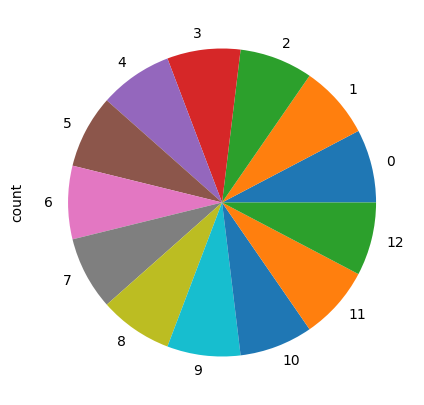

In [71]:
# draw the distribution of the data
plt.figure(figsize=(5,5))
y_sm.value_counts().plot(kind='pie', color=['skyblue', 'orange', 'red', 'green', 'blue', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black', 'yellow', 'lightgreen', 'lightblue'])

In [72]:
# combine the data
X_sm['Label'] = y_sm
df_new = X_sm
df_new

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMean,BwdPacketLengthStd,...,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_backward,act_data_pkt_fwd,ActiveStd,ActiveMax,IdleStd,Label
0,3167586,3,3,6,6,0,3.464102,6,2.000000,3.464102,...,3,6,3,6,29,1,0.0,0,0.0,0
1,8257899,21,30,993,38147,0,105.314834,4380,1271.566667,1082.743759,...,21,993,30,38147,141,19,0.0,0,0.0,0
2,212011,5,4,212,140,0,84.786791,128,35.000000,62.064483,...,5,212,4,140,237,4,0.0,0,0.0,1
3,67674,4,3,210,134,0,97.041228,128,44.666667,72.231111,...,4,210,3,134,237,3,0.0,0,0.0,1
4,996697,3,3,0,18,0,0.000000,6,6.000000,0.000000,...,3,0,3,18,0,0,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88083,5025409,3,1,0,0,0,0.000000,0,0.000000,0.000000,...,3,0,1,0,28960,0,0.0,0,0.0,12
88084,4152634,3,1,0,0,0,0.000000,0,0.000000,0.000000,...,3,0,1,0,28960,0,0.0,0,0.0,12
88085,5157643,3,1,0,0,0,0.000000,0,0.000000,0.000000,...,3,0,1,0,28960,0,0.0,0,0.0,12
88086,2874333,2,0,0,0,0,0.000000,0,0.000000,0.000000,...,2,0,0,0,21027,0,0.0,0,0.0,12


In [ ]:
# save to csv
df_new.to_csv('datasets/MachineLearningCVE/combined data/combined_data_new_0306.csv', index=False)

### Train Test Split

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split



# Initial train test split set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split training set into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)